# Regression Analysis of the Housing Prices

## Author: Houston Asher-Laws

## November 25, 2025

In this project I will be using Regression Analysis on the Housing Prices data set. I will use it to predict home vaules based on the month and year the house was sold and the size of the lot (MoSold, YrSold, and LotArea).

In [10]:
# This is a Python cell
# All imports should be at the top of the notebook
# This cell will be executed when the notebook is loaded

# Import pandas for data manipulation and analysis (we might want to do more with it)
import pandas as pd 
# Import matplotlib for creating static visualizations
import matplotlib.pyplot as plt 
# Import seaborn for statistical data visualization (built on matplotlib)
import seaborn as sns   
# Import the California housing dataset from sklearn
from sklearn.datasets import fetch_california_housing

# Import train_test_split for splitting data into training and test sets
from sklearn.model_selection import train_test_split
# Import LinearRegression for building a linear regression model
from sklearn.linear_model import LinearRegression  
# Import performance metrics for model evaluation
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error


from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Section 1. Import and inspect the Data

In [11]:
df = pd.read_csv('data/train.csv')
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


## 1.2 Check for missing values and display summary statistics.

In [12]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [13]:
df.describe(include="all")


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


# Relection 1

I see that its about 81 columns long. The LotFrontage has about 259 missing values.

# Section 2. Data Exploration and Preparation

## 2.1 Explore data patterns and distributions

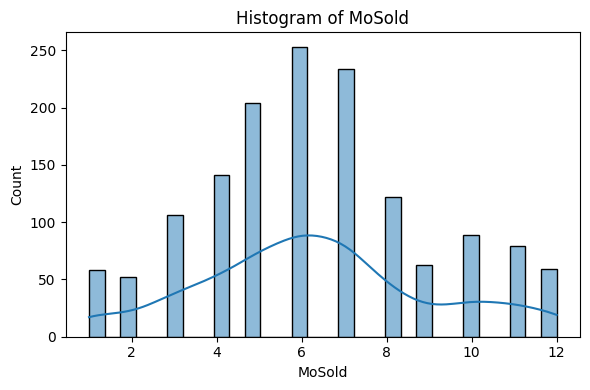

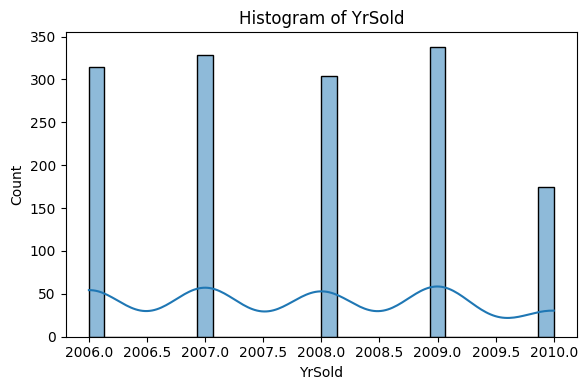

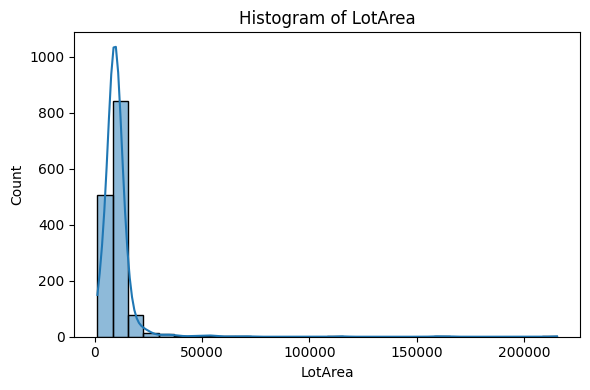

In [14]:
features = ['MoSold', 'YrSold', 'LotArea', ]

#Histograms

for col in features:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Histogram of {col}")
    plt.tight_layout()
    plt.show()


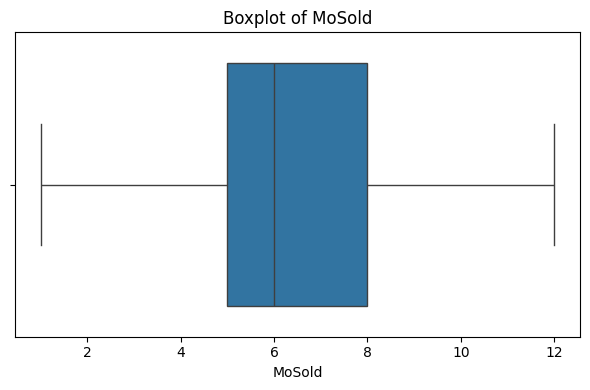

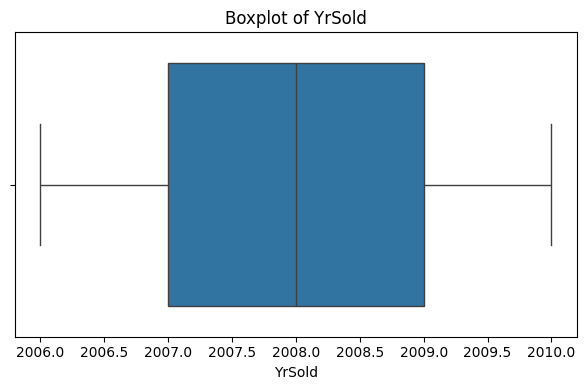

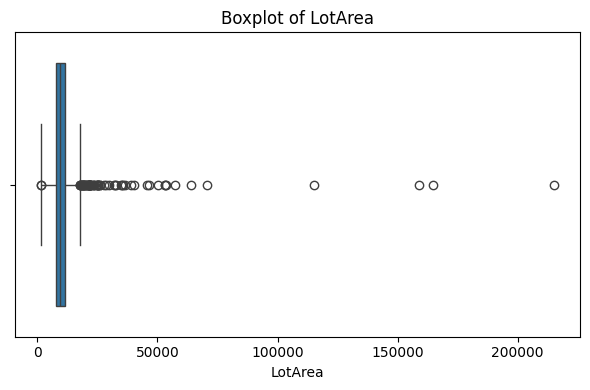

In [15]:
# Boxplots

for col in features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

# Relection 2

I saw that in the moSold historgram that during june and july the distribution was the highest. 

# Section 3. Feature Selection and Justification

## 3.1 Choose features and target

I choose MoSold, YrSold, LotArea.

I choose SalePrice for my target variable using Regression. 

The target variable is continuous so the best model to use would be Regression.

## 3.2 Define X and y

In [16]:
X = df[features ]
Y = df['SalePrice']

# Relection 3

I choose the features MoSold, YrSold, LotArea because they are strong features to predict the sales price with. Since they are strong features they can be easy to interpet and can improve accuracy.

# Section 4. Train a Model (Linear Regression)

### 4.1 Split the data into training and test sets using train_test_split (or StratifiedShuffleSplit if class imbalance is an issue).

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

NameError: name 'y' is not defined

### 4.2 Train model using Scikit-Learn model.fit() method


In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### 4.3 Evalulate performance, for example:

In [ ]:
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

print("Training R^2:", r2_score(y_train, y_train_pred))
print("Test R^2:", r2_score(y_test, y_test_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("Test RMSE:", rmse)

mae = mean_absolute_error(y_test, y_test_pred)
print("Test MAE:", mae)


Training R^2: 0.07253582708594197
Test R^2: 0.06642368907227258
Test RMSE: 84621.71614968598
Test MAE: 59518.48779649701


# Relection 4

It looks like the test R^2 0.066 is lower then the Tranining R^2 at 0.072. It looks like the model performed very low over all. 

## Section 5. Improve the Model or Try Alternates (Implement Pipelines)

### 5.1 Implement Pipeline 1: Imputer → StandardScaler → Linear Regression.

In [ ]:
pipe1 = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("model", LinearRegression())
])

pipe1.fit(X_train, y_train)

y_train_pred_p1 = pipe1.predict(X_train)
y_test_pred_p1 = pipe1.predict(X_test)

rmse_p1 = np.sqrt(mean_squared_error(y_test, y_test_pred_p1))
mae_p1 = mean_absolute_error(y_test, y_test_pred_p1)

print("Pipeline 1 - Training R^2:", r2_score(y_train, y_train_pred_p1))
print("Pipeline 1 - Test R^2:", r2_score(y_test, y_test_pred_p1))
print("Pipeline 1 - Test RMSE:", rmse_p1)
print("Pipeline 1 - Test MAE:", mae_p1)


Pipeline 1 - Training R^2: 0.07253582708594186
Pipeline 1 - Test R^2: 0.06642368907228036
Pipeline 1 - Test RMSE: 84621.71614968561
Pipeline 1 - Test MAE: 59518.48779649677


### 5.2 Implement Pipeline 2: Imputer → Polynomial Features (degree=3) → StandardScaler → Linear Regression.

In [ ]:
pipe2 = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("poly", PolynomialFeatures(degree=3, include_bias=False)),
    ("scaler", StandardScaler()),
    ("model", LinearRegression())
])


pipe2.fit(X_train, y_train)


y_train_pred_p2 = pipe2.predict(X_train)
y_test_pred_p2 = pipe2.predict(X_test)


r2_train_p2 = r2_score(y_train, y_train_pred_p2)
r2_test_p2 = r2_score(y_test, y_test_pred_p2)
rmse_p2 = np.sqrt(mean_squared_error(y_test, y_test_pred_p2))
mae_p2 = mean_absolute_error(y_test, y_test_pred_p2)

print("Pipeline 2 - Training R^2:", r2_train_p2)
print("Pipeline 2 - Test R^2:", r2_test_p2)
print("Pipeline 2 - Test RMSE:", rmse_p2)
print("Pipeline 2 - Test MAE:", mae_p2)

Pipeline 2 - Training R^2: 0.19905849342995108
Pipeline 2 - Test R^2: 0.13765580651282228
Pipeline 2 - Test RMSE: 81329.33829142067
Pipeline 2 - Test MAE: 58100.87110932305


### 5.3 Compare performance of all models across the same performance metrics

In [ ]:
def report(name, y_true, y_pred):
    print(f"{name} R²: {r2_score(y_true, y_pred):.3f}")
    print(f"{name} RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"{name} MAE: {mean_absolute_error(y_true, y_pred):.2f}\n")

report("Baseline Linear Regression", y_test, y_test_pred)
report("Pipeline 1 (Scaler + Linear Regression)", y_test, y_test_pred_p1)
report("Pipeline 2 (Polynomial=3 + Scaler + Linear Regression)", y_test, y_test_pred_p2)

Baseline Linear Regression R²: 0.066
Baseline Linear Regression RMSE: 84621.72
Baseline Linear Regression MAE: 59518.49

Pipeline 1 (Scaler + Linear Regression) R²: 0.066
Pipeline 1 (Scaler + Linear Regression) RMSE: 84621.72
Pipeline 1 (Scaler + Linear Regression) MAE: 59518.49

Pipeline 2 (Polynomial=3 + Scaler + Linear Regression) R²: 0.138
Pipeline 2 (Polynomial=3 + Scaler + Linear Regression) RMSE: 81329.34
Pipeline 2 (Polynomial=3 + Scaler + Linear Regression) MAE: 58100.87



# Relection 5

It looks like that Pipeline 2 performed the best out of baseline and pipline 1. Pipeline 2 had a higher R2 0.1.38 then pipline 1 of 0.066 and Baseline of 0.066. Scaling did not have much of a impact on the results.

# Section 6. Final Thoughts & Insights

### 6.1 Summarize findings.

| Model                                             | R²     | RMSE       | MAE        |
|---------------------------------------------------|--------|------------|------------|
| Baseline Linear Regression                        | 0.066  | 84621.72   | 59518.49   |
| Pipeline 1 (Scaler + Linear Regression)           | 0.066  | 84621.72   | 59518.49   |
| Pipeline 2 (Polynomial=3 + Scaler + LR)           | 0.138  | 81329.34   | 58100.87   |


It looks like pipeline 2 performed the best out of the three. After using the three features of Mosold, Yrsold, and Lotarea I found that these features might of not been the best to use. I came to this conclusion with the testing.

### 6.2 Discuss challenges faced.

A challenged I faced was trying to decide what features to foucs on out of the 81 columns. I wasn't too sure what features to choose to get the best results.

### 6.3 If you had more time, what would you try next?

I would Try using differnet features to see if I could get better results. By doing this I could see if could of gotten closer to by goal of trying to prdict the sales price.